Accuracy: 96.39%
Precision: 96.26%
Recall: 96.47%
F1 Score: 96.37%
Confusion Matrix:
 [[14536   558]
 [  526 14380]]
ROC-AUC Score: 96.39%


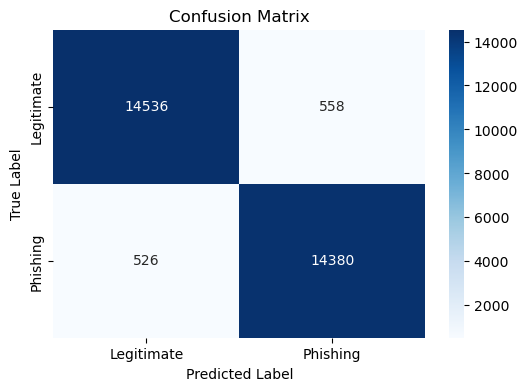


Top Feature Importances:
domain_entropy: 0.2610
has_legit_tld: 0.1937
token_count_domain: 0.1406
url_entropy: 0.1110
domain_length: 0.0359
is_free_hosting: 0.0353
num_delimiters_path: 0.0319
char_repetition_ratio: 0.0313
path_length: 0.0221
brand_max_token_set_ratio: 0.0174
special_char_ratio: 0.0114
normalized_brand_similarity: 0.0113
has_suspicious_tld: 0.0112
num_subdomains: 0.0097
num_digits: 0.0088
ratio_url_path: 0.0088
has_unusual_subdomain: 0.0087
brand_max_partial_ratio: 0.0086
url_length: 0.0073
num_dots: 0.0070


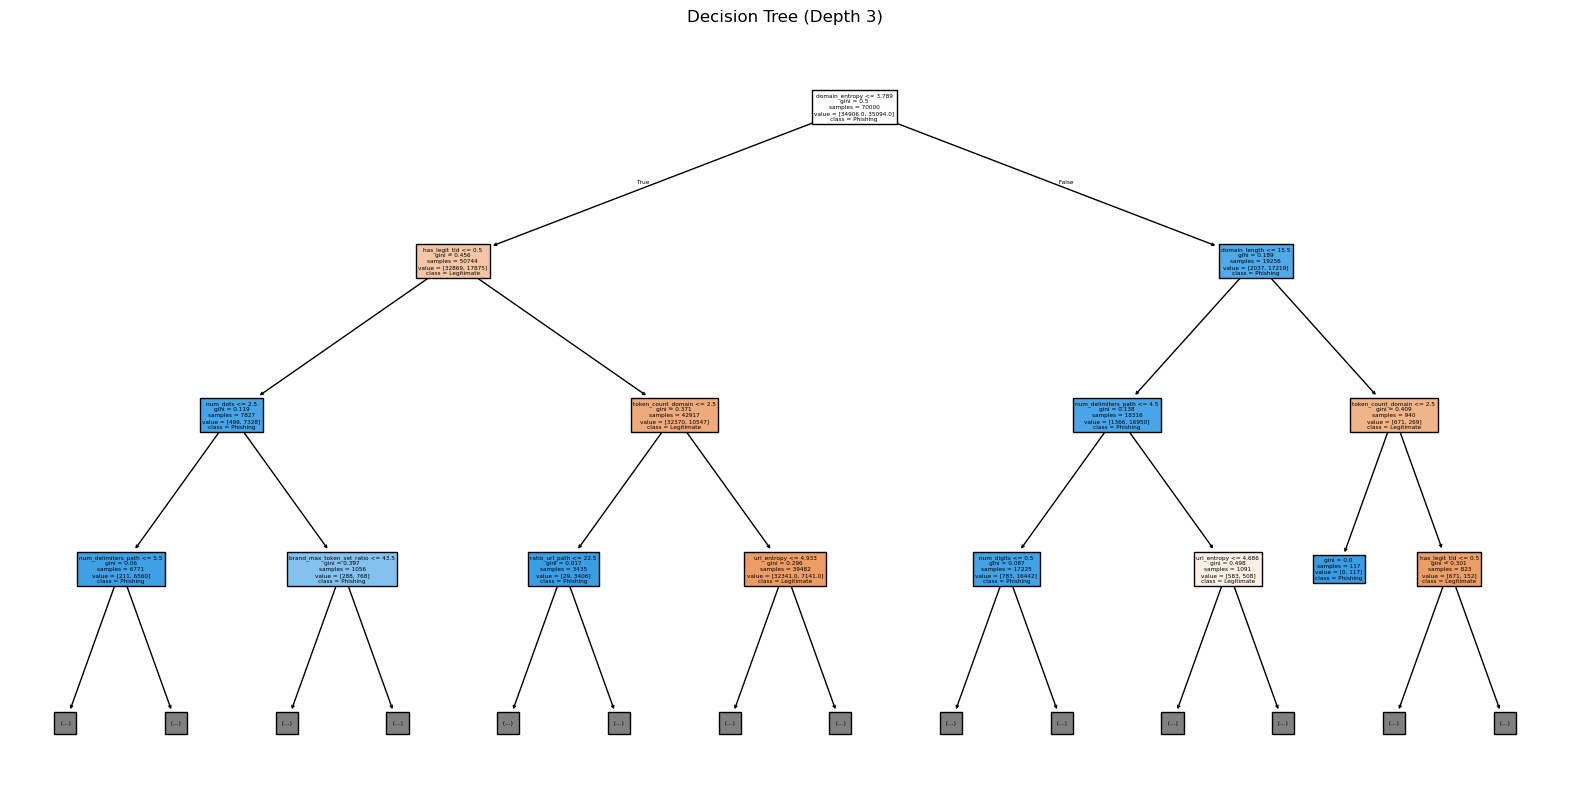

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     15094
           1       0.96      0.96      0.96     14906

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



In [9]:
from IPython.display import display, HTML
display(HTML("<style>.output_scroll { overflow-x: visible !important; }</style>"))

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Load dataset
dataset = pd.read_csv('phishing_features.csv')

# Prepare features and labels
features = dataset.iloc[:, :-1].to_numpy()
labels = dataset.iloc[:, -1].to_numpy()

# Normalize features
#scaler = MinMaxScaler()
#features = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Needed for ROC-AUC

# Evaluate model


accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

# Display results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc:.2f}%")

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


import numpy as np

feature_names = dataset.columns[:-1]  # all columns except the label
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nTop Feature Importances:")
for i in indices[:20]:  # top 10
    print(f"{feature_names[i]}: {importances[i]:.4f}")

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=['Legitimate', 'Phishing'], filled=True, max_depth=3)
plt.title("Decision Tree (Depth 3)")
plt.show()

from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))